In [1]:
import pandas as pd
import numpy as np
import hashlib as hb


In [2]:
score_class='l'

# Score

In [3]:
score_pd = pd.read_csv('../data/score.csv')
score_pd = score_pd[score_pd['class'] == score_class]
score_pd.rename(columns={'id': 'userid'}, inplace=True)
score_pd['userid'] = score_pd['userid'].astype(int)
score_pd

,userid,score,class
556,108408524,50,l
557,109101008,83,l
558,109102202,60,l
559,109201525,96,l
560,109202513,91,l
561,109203013,95,l
562,109401001,93,l
563,109401518,85,l
564,109401538,72,l
565,109401546,81,l


# BOOKROLL

In [4]:
br_pd = pd.read_csv('../data/br.csv')
#br_pd = br_pd.drop(['REGIST CONTENTS', 'CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION'], axis =1)
#br_pd = br_pd[br_pd['class']==score_class]
#br_pd = br_pd.drop('class', axis=1)
br_pd

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,LINK_CLICK,MEMO_JUMP,NEXT,NOTGETIT,OPEN,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
0,108408524,0,21,9,0,0,3,44,0,0,...,0,0,1477,0,61,100,423,5,0,0
1,109101008,4,72,20,0,0,44,82,0,4,...,0,6,3527,0,128,2,900,0,0,0
2,109102202,0,4,7,2,0,7,44,0,0,...,0,0,1566,0,79,37,469,0,0,0
3,109201525,0,19,10,0,0,20,77,0,0,...,0,0,3074,1,97,36,1607,0,0,0
4,109202513,0,120,13,0,0,46,48,0,0,...,0,0,2702,0,83,5,876,0,0,0
5,109203013,5,11,7,0,0,18,75,0,5,...,0,0,3417,3,99,12,1787,0,0,0
6,109401001,0,33,7,0,0,17,12,0,0,...,0,0,719,0,35,36,121,0,0,0
7,109401518,16,30,11,0,73,43,30,0,6,...,0,0,1032,0,52,129,495,0,0,0
8,109401538,1,0,6,0,0,10,42,0,1,...,0,0,1747,0,63,1,466,0,0,0
9,109401546,0,7,6,0,0,6,52,0,0,...,0,0,2043,1,77,49,1193,0,0,0


In [5]:
br_pd.columns

Index(['userid', 'ADD BOOKMARK', 'ADD MARKER', 'ADD MEMO', 'ADD_HW_MEMO',
       'BOOKMARK_JUMP', 'CHANGE MEMO', 'CLOSE', 'CLOSE_RECOMMENDATION',
       'DELETE BOOKMARK', 'DELETE MARKER', 'DELETE_MEMO', 'GETIT',
       'LINK_CLICK', 'MEMO_JUMP', 'NEXT', 'NOTGETIT', 'OPEN', 'PAGE_JUMP',
       'PREV', 'SEARCH', 'SEARCH_JUMP', 'UNDO_HW_MEMO'],
      dtype='object')

In [6]:
reading_action = ['CLOSE', 'MEMO_JUMP', 'NEXT', 'OPEN', 'PAGE_JUMP', 'PREV', 'SEARCH', 'SEARCH_JUMP','LINK_CLICK']

In [7]:
annotation_action = ['ADD MARKER', 'ADD MEMO', 'ADD_HW_MEMO', 'CHANGE MEMO', 
                     'DELETE BOOKMARK', 'DELETE_MEMO', 'DELETE MARKER', 'GETIT', 'NOTGETIT', 'UNDO_HW_MEMO' ]

In [8]:
br_pd['br_annotation'] =  br_pd['ADD BOOKMARK']
for feature in annotation_action:
    br_pd['br_annotation'] += br_pd[feature]

br_pd['br_reading_action'] =  br_pd['BOOKMARK_JUMP']
for feature in reading_action:
    br_pd['br_reading_action'] += br_pd[feature]

br_pd

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NEXT,NOTGETIT,OPEN,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO,br_annotation,br_reading_action
0,108408524,0,21,9,0,0,3,44,0,0,...,1477,0,61,100,423,5,0,0,34,2110
1,109101008,4,72,20,0,0,44,82,0,4,...,3527,0,128,2,900,0,0,0,162,4645
2,109102202,0,4,7,2,0,7,44,0,0,...,1566,0,79,37,469,0,0,0,22,2195
3,109201525,0,19,10,0,0,20,77,0,0,...,3074,1,97,36,1607,0,0,0,56,4891
4,109202513,0,120,13,0,0,46,48,0,0,...,2702,0,83,5,876,0,0,0,187,3714
5,109203013,5,11,7,0,0,18,75,0,5,...,3417,3,99,12,1787,0,0,0,59,5390
6,109401001,0,33,7,0,0,17,12,0,0,...,719,0,35,36,121,0,0,0,64,923
7,109401518,16,30,11,0,73,43,30,0,6,...,1032,0,52,129,495,0,0,0,109,1811
8,109401538,1,0,6,0,0,10,42,0,1,...,1747,0,63,1,466,0,0,0,19,2319
9,109401546,0,7,6,0,0,6,52,0,0,...,2043,1,77,49,1193,0,0,0,22,3414


In [9]:
keep_list = ['userid','br_annotation', 'br_reading_action']
br_pd = br_pd[keep_list]
br_pd

,userid,br_annotation,br_reading_action
0,108408524,34,2110
1,109101008,162,4645
2,109102202,22,2195
3,109201525,56,4891
4,109202513,187,3714
5,109203013,59,5390
6,109401001,64,923
7,109401518,109,1811
8,109401538,19,2319
9,109401546,22,3414


# VisCode

In [10]:
viscode_pd = pd.read_csv('../data/viscode.csv')
viscode_pd

,userid,code_copy,code_execution,code_paste,code_speed,notebook_open,use_copilot,AttributeError,FileExistsError,FileNotFoundError,...,ValueError,ZeroDivisionError,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time
0,108408524,280,525,222,1025,42,0,2.0,0.0,0.0,...,0.0,0.0,823,42,1069,42,988,81.0,4.0,0 days 00:46:58
1,109101008,0,265,0,488,16,0,4.0,0.0,0.0,...,5.0,0.0,1016,16,281,16,142,139.0,6.0,0 days 00:28:19
2,109102202,1,28,0,33,21,0,0.0,0.0,0.0,...,0.0,0.0,132,21,50,21,39,11.0,3.0,0 days 00:03:46
3,109201525,324,685,505,3027,107,4,9.0,0.0,0.0,...,0.0,0.0,5943,107,1625,107,1541,84.0,8.0,0 days 01:21:29
4,109202513,702,961,263,1637,50,0,0.0,0.0,0.0,...,0.0,0.0,4200,50,1976,50,1875,101.0,4.0,0 days 01:55:27
5,109203013,187,435,173,801,33,0,1.0,0.0,0.0,...,0.0,1.0,6063,33,828,33,759,69.0,7.0,0 days 00:40:10
6,109401001,264,289,359,3585,38,4,0.0,0.0,0.0,...,7.0,0.0,4476,38,954,38,894,60.0,7.0,0 days 00:20:36
7,109401518,212,413,233,605,47,0,1.0,0.0,0.0,...,1.0,0.0,623,47,905,47,861,44.0,6.0,0 days 00:39:07
8,109401538,159,262,299,863,32,0,3.0,0.0,0.0,...,0.0,0.0,1527,32,752,32,693,59.0,5.0,0 days 00:26:11
9,109401546,107,166,185,255,32,4,0.0,0.0,0.0,...,1.0,0.0,1731,32,494,32,473,21.0,5.0,0 days 00:13:01


In [11]:
viscode_pd['vc_success_run'] = viscode_pd['code_execution'] - viscode_pd['Viscode-failed_run']
viscode_pd['vc_failed_run'] = viscode_pd['Viscode-failed_run']
viscode_pd['vc_action'] = viscode_pd['Viscode-login_times'] + viscode_pd['notebook_open'] #+ viscode_pd['tree_open']
viscode_pd['vc_error_type'] = viscode_pd['Viscode-error_types']

In [12]:
keep_list = ['userid','vc_success_run', 'vc_failed_run', 'vc_action', 'vc_error_type']
vc_pd = viscode_pd[keep_list]
vc_pd

,userid,vc_success_run,vc_failed_run,vc_action,vc_error_type
0,108408524,444.0,81.0,84,4.0
1,109101008,126.0,139.0,32,6.0
2,109102202,17.0,11.0,42,3.0
3,109201525,601.0,84.0,214,8.0
4,109202513,860.0,101.0,100,4.0
5,109203013,366.0,69.0,66,7.0
6,109401001,229.0,60.0,76,7.0
7,109401518,369.0,44.0,94,6.0
8,109401538,203.0,59.0,64,5.0
9,109401546,145.0,21.0,64,5.0


# OJ_P

In [13]:
oj_problem = pd.read_csv('../data/OJ.csv')
oj_list = []
for i in range(len(oj_problem)) :
    log = oj_problem.iloc[i]
    # print(log.problem )
    if 'P' in log.problem:
        oj_list.append(log)
oj_prob = pd.DataFrame(oj_list)

oj_status_grouped = oj_prob.groupby(['username', 'status']).size().reset_index(name='count')
oj_status_grouped = oj_status_grouped.pivot(index='username', columns='status', values='count').fillna(0).astype(int)

# oj_status_grouped

user_list = pd.DataFrame( oj_status_grouped.index)
# user_list = user_list
#test = user_list['username'].apply(md5)
#oj_status_grouped['userid'] = list(test)
oj_status_grouped = oj_status_grouped.rename_axis('userid').reset_index()
oj_status_grouped['userid'] = oj_status_grouped['userid'].astype(int)
oj_status_grouped_P=oj_status_grouped.rename(columns={
    'oj.Accept': 'P_oj.Accept',
    'oj.CompileError': 'P_oj.CompileError',
    'oj.RuntimeError': 'P_oj.RuntimeError',
    'oj.Time Limit Exceeded': 'P_oj.TimeLimitExceeded',
    'oj.WrongAnswer': 'P_oj.WrongAnswer'
})
oj_status_grouped_P

status,userid,P_oj.Accept,P_oj.CompileError,P_oj.RuntimeError,P_oj.TimeLimitExceeded,P_oj.WrongAnswer
0,108408524,43,18,23,0,77
1,109101008,52,74,74,1,66
2,109102202,15,15,4,0,30
3,109201525,136,21,22,1,84
4,109202513,50,3,19,0,45
5,109203013,45,7,8,4,21
6,109401001,48,10,16,1,37
7,109401518,48,6,16,0,25
8,109401538,43,9,5,0,15
9,109401546,53,7,2,0,35


# OJ_E

In [14]:
oj_problem = pd.read_csv('../data/OJ.csv')
oj_list = []
for i in range(len(oj_problem)) :
    log = oj_problem.iloc[i]
    # print(log.problem )
    if 'E' in log.problem:
        oj_list.append(log)
oj_prob = pd.DataFrame(oj_list)

oj_status_grouped = oj_prob.groupby(['username', 'status']).size().reset_index(name='count')
oj_status_grouped = oj_status_grouped.pivot(index='username', columns='status', values='count').fillna(0).astype(int)
# oj_status_grouped

user_list = pd.DataFrame( oj_status_grouped.index)

oj_status_grouped = oj_status_grouped.rename_axis('userid').reset_index()
oj_status_grouped['userid'] = oj_status_grouped['userid'].astype(int)
oj_status_grouped_E=oj_status_grouped.rename(columns={
    'oj.Accept': 'E_oj.Accept',
    'oj.CompileError': 'E_oj.CompileError',
    'oj.RuntimeError': 'E_oj.RuntimeError',
    'oj.Time Limit Exceeded': 'E_oj.TimeLimitExceeded',
    'oj.WrongAnswer': 'E_oj.WrongAnswer'
})

oj_status_grouped_E

status,userid,E_oj.Accept,E_oj.CompileError,E_oj.RuntimeError,E_oj.TimeLimitExceeded,E_oj.WrongAnswer
0,108408524,29,0,23,0,18
1,109101008,33,101,106,0,69
2,109102202,24,30,5,0,30
3,109201525,110,8,24,0,83
4,109202513,38,5,15,2,17
5,109203013,33,1,2,1,20
6,109401001,33,3,0,0,8
7,109401518,37,21,19,0,22
8,109401538,29,2,1,0,7
9,109401546,38,4,3,0,18


# AS&RS

In [15]:
total_table = None

for i in range(1, 9):
    filename = f'C{i}分數.xlsx'
    filepath = "../data/"+filename

    df = pd.read_excel(filepath)

    if total_table is None:
        total_table = df
    else:
        total_table.iloc[:, 2:] += df.iloc[:, 2:]
total_table
# 将结果保存到一个新文件
#total_table.to_excel('total_scores.xlsx', index=False)

,Unnamed: 0,stdID,RS_accept,RS_wrong,AS_accept,AS_wrong
0,0,108408524,35,50,68,43
1,1,109101008,57,97,130,100
2,2,109102202,76,104,62,29
3,3,109201525,152,310,321,65
4,4,109202513,36,50,77,19
5,5,109203013,68,174,58,26
6,6,109401001,76,96,42,6
7,7,109401518,36,53,57,18
8,8,109401538,48,43,45,26
9,9,109401546,49,47,56,16


In [16]:
RS_AS_pd =  total_table.drop(['Unnamed: 0'], axis=1)
RS_AS_pd.rename(columns={'stdID': 'userid'}, inplace=True) 
RS_AS_pd['userid'] = RS_AS_pd['userid'].astype(int)
#RS_AS_pd.index = RS_AS_pd['userid'] 

RS_AS_pd

,userid,RS_accept,RS_wrong,AS_accept,AS_wrong
0,108408524,35,50,68,43
1,109101008,57,97,130,100
2,109102202,76,104,62,29
3,109201525,152,310,321,65
4,109202513,36,50,77,19
5,109203013,68,174,58,26
6,109401001,76,96,42,6
7,109401518,36,53,57,18
8,109401538,48,43,45,26
9,109401546,49,47,56,16


# SRL Motivation

In [17]:
srl_motivate_pd = pd.read_csv('../data/srl_motivation_前.csv')


# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_motivate_pd.columns[1:32]
srl_motivate_pd['sd'] = srl_motivate_pd[question_list].std(axis=1)
keep_list = srl_motivate_pd['sd'] > 0
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    intrinsic       : 1-4 (4)
    extrinsic       : 5-8 (4)
    task_value      : 9-14 (6)
    control_beliefs : 15-18 (4)
    self_efficacy   : 19-26 (8)
    test_anxiety    : 27-31 (5)
'''

# classify data with same category
i = 1
intrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
extrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
task_value = srl_motivate_pd.columns[i:i+6]
i = i + 6
control_beliefs = srl_motivate_pd.columns[i:i+4]
i = i + 4
self_efficacy_and_performance = srl_motivate_pd.columns[i:i+8]
i = i + 8
test_anxiety = srl_motivate_pd.columns[i:i+5]


srl_motivate_pd['intrinsic_前'] = srl_motivate_pd[intrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['extrinsic_前'] = srl_motivate_pd[extrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['task_value_前'] = srl_motivate_pd[task_value].sum(axis=1)/6
srl_motivate_pd['control_beliefs_前'] = srl_motivate_pd[control_beliefs].sum(axis=1)/4
srl_motivate_pd['self_efficacy_前'] = srl_motivate_pd[self_efficacy_and_performance].sum(axis=1)/8
srl_motivate_pd['test_anxiety_前'] = srl_motivate_pd[test_anxiety].sum(axis=1)/5

# keep data with same category
keep_list = ['userid', 'intrinsic_前', 'extrinsic_前', 'task_value_前', 'control_beliefs_前', 'self_efficacy_前', 'test_anxiety_前']
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd = srl_motivate_pd.reset_index()
srl_motivate_pd = srl_motivate_pd.drop('index', axis=1)
srl_motivation_pd = round(srl_motivate_pd, 2) # 取到小數點第二位
srl_motivate_pd_前 = srl_motivation_pd
srl_motivate_pd_前

,userid,intrinsic_前,extrinsic_前,task_value_前,control_beliefs_前,self_efficacy_前,test_anxiety_前
0,111409535,4.25,3.25,3.67,4.50,3.12,2.0
1,112408531,4.50,4.25,4.67,4.00,5.00,5.0
2,109408535,3.50,3.50,3.50,2.75,1.88,3.0
3,110303583,4.75,4.25,4.67,4.00,4.25,2.8
4,109408524,4.25,3.75,4.67,4.00,3.00,3.6
5,109401001,4.00,4.00,3.17,3.75,3.62,4.0
6,109102202,3.25,4.50,4.17,3.75,2.88,3.2
7,112409535,2.75,3.75,3.33,3.00,3.00,3.0
8,109408516,3.00,4.50,4.17,4.50,3.62,2.4
9,109401518,5.00,2.75,5.00,5.00,4.38,1.0


In [18]:
srl_motivate_pd = pd.read_csv('../data/srl_motivation_後.csv')


# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_motivate_pd.columns[1:32]
srl_motivate_pd['sd'] = srl_motivate_pd[question_list].std(axis=1)
keep_list = srl_motivate_pd['sd'] > 0
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    intrinsic       : 1-4 (4)
    extrinsic       : 5-8 (4)
    task_value      : 9-14 (6)
    control_beliefs : 15-18 (4)
    self_efficacy   : 19-26 (8)
    test_anxiety    : 27-31 (5)
'''

# classify data with same category
i = 1
intrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
extrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
task_value = srl_motivate_pd.columns[i:i+6]
i = i + 6
control_beliefs = srl_motivate_pd.columns[i:i+4]
i = i + 4
self_efficacy_and_performance = srl_motivate_pd.columns[i:i+8]
i = i + 8
test_anxiety = srl_motivate_pd.columns[i:i+5]


srl_motivate_pd['intrinsic_後'] = srl_motivate_pd[intrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['extrinsic_後'] = srl_motivate_pd[extrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['task_value_後'] = srl_motivate_pd[task_value].sum(axis=1)/6
srl_motivate_pd['control_beliefs_後'] = srl_motivate_pd[control_beliefs].sum(axis=1)/4
srl_motivate_pd['self_efficacy_後'] = srl_motivate_pd[self_efficacy_and_performance].sum(axis=1)/8
srl_motivate_pd['test_anxiety_後'] = srl_motivate_pd[test_anxiety].sum(axis=1)/5

# keep data with same category
keep_list = ['userid', 'intrinsic_後', 'extrinsic_後', 'task_value_後', 'control_beliefs_後', 'self_efficacy_後', 'test_anxiety_後']
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd = srl_motivate_pd.reset_index()
srl_motivate_pd = srl_motivate_pd.drop('index', axis=1)
srl_motivation_pd = round(srl_motivate_pd, 2) # 取到小數點第二位
srl_motivate_pd_後 = srl_motivation_pd
srl_motivate_pd_後

,userid,intrinsic_後,extrinsic_後,task_value_後,control_beliefs_後,self_efficacy_後,test_anxiety_後
0,110303583,4.25,4.00,4.00,3.25,4.00,3.2
1,109408516,3.50,3.50,4.33,4.50,3.50,1.6
2,109401546,2.75,3.00,3.00,3.00,1.62,3.8
3,109401538,3.25,3.00,2.50,2.50,2.75,3.4
4,109201525,5.00,3.50,4.00,4.25,4.50,1.4
5,109401001,3.50,4.00,3.33,4.00,4.00,3.6
6,111409535,4.75,3.50,4.00,4.25,3.25,2.0
7,109409526,4.75,5.00,5.00,4.00,4.88,2.2
8,109409014,3.75,4.25,3.17,4.00,3.00,2.6
9,110409511,5.00,4.50,4.67,3.75,3.62,4.2


# SRL Strategy

In [19]:
srl_strategy_pd = pd.read_csv('../data/srl_strategy_前.csv')

# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_strategy_pd.columns[1:51]
srl_strategy_pd['sd'] = srl_strategy_pd[question_list].std(axis=1)
keep_list = srl_strategy_pd['sd'] > 0
srl_strategy_pd = srl_strategy_pd[keep_list]


'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    rehearsal         : 1-4    (4)
    elaboration       : 5-10   (6)
    organization      : 11-14  (4)
    critical_thinking : 15-19  (5)
    metacognitive_self_regulation   : 20-31 (12)
    time_environment  : 32-39  (8)
    effort_regulation : 40-43  (4)
    peer_learning     : 44-46  (3)
    help_seeking      : 47-50  (4)
'''

# classify data with same category
i = 1
rehearsal = srl_strategy_pd.columns[i:i+4]
i = i + 4
elaboration = srl_strategy_pd.columns[i:i+6]
i = i + 6
organization = srl_strategy_pd.columns[i:i+4]
i = i + 4
critical_thinking = srl_strategy_pd.columns[i:i+5]
i = i + 5
metacognitive_self_regulation = srl_strategy_pd.columns[i:i+12]
i = i + 12
time_environment = srl_strategy_pd.columns[i:i+8]
i = i + 8
effort_regulation = srl_strategy_pd.columns[i:i+4]
i = i + 4
peer_learning = srl_strategy_pd.columns[i:i+3]
i = i + 3
help_seeking = srl_strategy_pd.columns[i:i+4]


# avg
srl_strategy_pd['rehearsal_前'] = srl_strategy_pd[rehearsal].sum(axis=1) / 4
srl_strategy_pd['elaboration_前'] = srl_strategy_pd[elaboration].sum(axis=1) / 6
srl_strategy_pd['organization_前'] = srl_strategy_pd[organization].sum(axis=1) / 4
srl_strategy_pd['critical_thinking_前'] = srl_strategy_pd[critical_thinking].sum(axis=1)/ 5
srl_strategy_pd['metacognitive_self_regulation_前'] = srl_strategy_pd[metacognitive_self_regulation].sum(axis=1)/12
srl_strategy_pd['time_environment_前'] = srl_strategy_pd[time_environment].sum(axis=1)/8
srl_strategy_pd['effort_regulation_前'] = srl_strategy_pd[effort_regulation].sum(axis=1)/4
srl_strategy_pd['peer_learning_前'] = srl_strategy_pd[peer_learning].sum(axis=1)/3
srl_strategy_pd['help_seeking_前'] = srl_strategy_pd[help_seeking].sum(axis=1)/4

# keep data with same category
keep_list = ['userid', 'rehearsal_前', 'elaboration_前', 'organization_前', 'critical_thinking_前', 
             'metacognitive_self_regulation_前', 'time_environment_前', 'effort_regulation_前', 'peer_learning_前', 'help_seeking_前']
srl_strategy_pd = srl_strategy_pd[keep_list]
srl_strategy_pd = srl_strategy_pd.reset_index()
srl_strategy_pd = srl_strategy_pd.drop('index', axis=1)
srl_strategy_pd = round(srl_strategy_pd, 2)
srl_strategy_pd_前 = srl_strategy_pd
srl_strategy_pd_前

,userid,rehearsal_前,elaboration_前,organization_前,critical_thinking_前,metacognitive_self_regulation_前,time_environment_前,effort_regulation_前,peer_learning_前,help_seeking_前
0,111409535,3.75,3.83,3.75,3.8,3.67,4.00,4.00,2.33,4.50
1,109409014,4.25,4.00,4.25,4.6,3.92,3.38,4.00,3.00,4.00
2,11103505,3.25,3.00,3.00,3.0,3.00,3.00,3.00,3.00,3.00
3,111401504,4.00,3.50,3.75,3.0,3.33,3.50,3.50,2.00,3.00
4,109203013,4.00,4.00,4.00,4.0,3.92,3.25,3.50,3.00,3.25
5,112408531,4.50,4.33,4.50,4.4,3.42,3.75,2.50,4.00,4.00
6,111401518,3.25,3.67,3.50,4.0,3.33,3.88,3.50,3.00,3.50
7,109401563,4.50,4.50,4.25,4.2,3.83,4.12,4.25,4.00,3.25
8,111401563,3.75,4.00,4.00,4.0,3.75,3.25,3.00,4.00,3.50
9,109101008,4.00,3.83,3.50,2.8,3.42,4.00,4.00,4.33,4.25


In [20]:
srl_strategy_pd = pd.read_csv('../data/srl_strategy_後.csv')

# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_strategy_pd.columns[1:51]
srl_strategy_pd['sd'] = srl_strategy_pd[question_list].std(axis=1)
keep_list = srl_strategy_pd['sd'] > 0
srl_strategy_pd = srl_strategy_pd[keep_list]


'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    rehearsal         : 1-4    (4)
    elaboration       : 5-10   (6)
    organization      : 11-14  (4)
    critical_thinking : 15-19  (5)
    metacognitive_self_regulation   : 20-31 (12)
    time_environment  : 32-39  (8)
    effort_regulation : 40-43  (4)
    peer_learning     : 44-46  (3)
    help_seeking      : 47-50  (4)
'''

# classify data with same category
i = 1
rehearsal = srl_strategy_pd.columns[i:i+4]
i = i + 4
elaboration = srl_strategy_pd.columns[i:i+6]
i = i + 6
organization = srl_strategy_pd.columns[i:i+4]
i = i + 4
critical_thinking = srl_strategy_pd.columns[i:i+5]
i = i + 5
metacognitive_self_regulation = srl_strategy_pd.columns[i:i+12]
i = i + 12
time_environment = srl_strategy_pd.columns[i:i+8]
i = i + 8
effort_regulation = srl_strategy_pd.columns[i:i+4]
i = i + 4
peer_learning = srl_strategy_pd.columns[i:i+3]
i = i + 3
help_seeking = srl_strategy_pd.columns[i:i+4]


# avg
srl_strategy_pd['rehearsal_後'] = srl_strategy_pd[rehearsal].sum(axis=1) / 4
srl_strategy_pd['elaboration_後'] = srl_strategy_pd[elaboration].sum(axis=1) / 6
srl_strategy_pd['organization_後'] = srl_strategy_pd[organization].sum(axis=1) / 4
srl_strategy_pd['critical_thinking_後'] = srl_strategy_pd[critical_thinking].sum(axis=1)/ 5
srl_strategy_pd['metacognitive_self_regulation_後'] = srl_strategy_pd[metacognitive_self_regulation].sum(axis=1)/12
srl_strategy_pd['time_environment_後'] = srl_strategy_pd[time_environment].sum(axis=1)/8
srl_strategy_pd['effort_regulation_後'] = srl_strategy_pd[effort_regulation].sum(axis=1)/4
srl_strategy_pd['peer_learning_後'] = srl_strategy_pd[peer_learning].sum(axis=1)/3
srl_strategy_pd['help_seeking_後'] = srl_strategy_pd[help_seeking].sum(axis=1)/4

# keep data with same category
keep_list = ['userid', 'rehearsal_後', 'elaboration_後', 'organization_後', 'critical_thinking_後', 
             'metacognitive_self_regulation_後', 'time_environment_後', 'effort_regulation_後', 'peer_learning_後', 'help_seeking_後']
srl_strategy_pd = srl_strategy_pd[keep_list]
srl_strategy_pd = srl_strategy_pd.reset_index()
srl_strategy_pd = srl_strategy_pd.drop('index', axis=1)
srl_strategy_pd = round(srl_strategy_pd, 2)
srl_strategy_pd_後 = srl_strategy_pd
srl_strategy_pd_後

,userid,rehearsal_後,elaboration_後,organization_後,critical_thinking_後,metacognitive_self_regulation_後,time_environment_後,effort_regulation_後,peer_learning_後,help_seeking_後
0,110303583,4.00,4.00,4.25,3.2,2.92,3.50,3.75,2.00,3.00
1,109408516,4.00,4.00,3.50,4.0,3.92,4.38,3.50,3.00,3.50
2,109401546,3.75,3.00,3.00,3.2,3.00,3.00,3.25,3.67,3.50
3,109401538,3.00,3.17,3.00,3.8,3.25,3.50,2.75,3.00,4.00
4,109201525,5.00,5.00,5.00,5.0,4.00,3.50,3.00,5.00,4.00
5,109401001,3.75,3.83,4.00,4.0,3.50,3.12,3.00,2.67,3.25
6,109409014,3.75,3.33,3.75,3.4,3.33,2.88,3.25,3.67,3.75
7,109409526,3.75,4.33,5.00,4.6,4.00,4.88,5.00,4.33,4.00
8,110409511,4.50,4.83,5.00,5.0,4.17,3.75,4.25,4.00,3.75
9,109409529,3.00,4.17,4.50,4.4,3.92,3.50,3.00,4.33,3.50


# 認知負荷

In [24]:
combined_pd = pd.DataFrame()

file_list = ['C1(變數與資料型態)','C2(數值與字串型態運用)','C3(串列List)','C4(IF選擇)','C5&6(For&While)','C7(Dictionary)','C8(Function)','Git&GitHub']
category_list =['內在','外在','增生']
for i in file_list:
    filename = f'1122_認知負荷問卷_{i}.csv'
    filepath = "../data/"+filename

    df = pd.read_csv(filepath)
    
    df = df.drop(columns=['時間戳記', '姓名', '系級'])
    df.rename(columns={'學號': 'userid'}, inplace=True)
    df.drop_duplicates(subset=['userid'], inplace=True, keep='first')     
    
    keep_list=['userid',f'內在_{i}',f'外在_{i}',f'增生_{i}']
    df[keep_list[1]] = df[df.columns[1:4]].mean(axis=1)
    df[keep_list[2]] = df[df.columns[4:7]].mean(axis=1)
    df[keep_list[3]] = df[df.columns[7:11]].mean(axis=1)
    
    df = df[keep_list]
    df = round(df, 2)
    if combined_pd.empty:
        combined_pd = df
    else:
        combined_pd=pd.merge(combined_pd, df, on='userid', how='outer')

print(combined_pd)

       userid  內在_C1(變數與資料型態)  外在_C1(變數與資料型態)  增生_C1(變數與資料型態)  \
0   111409535            3.00            2.00            9.00   
1   112408531            1.00            4.00           10.00   
2   109401563            1.33            2.00            7.25   
3   109201525            1.00            1.00           10.00   
4   109401518            1.00            1.00           10.00   
5   111401563            1.67            2.00            9.00   
6   110401028            5.00            5.00            5.00   
7   112408007            3.33            1.33            8.00   
8   111401504            6.00            5.00            6.75   
9   109203013            3.67            3.00            8.00   
10  109408516            3.00            2.33            8.00   
11  109409529            2.33            2.33            2.25   
12  109408524            2.00            1.00            9.00   
13  110303583            3.00            1.00            8.50   
14   11103505            

# Merge Data

In [25]:
merge_pd = pd.merge(score_pd, br_pd, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, vc_pd, on='userid', how = 'outer')
merge_pd = pd.merge(merge_pd, oj_status_grouped_P, on='userid', how = 'outer')
merge_pd = pd.merge(merge_pd, oj_status_grouped_E, on='userid', how = 'outer')
merge_pd = pd.merge(merge_pd, RS_AS_pd, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, srl_motivate_pd_前, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, srl_motivate_pd_後, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, srl_strategy_pd_前, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, srl_strategy_pd_後, on='userid', how='outer')
merge_pd = pd.merge(merge_pd, combined_pd, on='userid', how='outer')
merge_pd

,userid,score,class,br_annotation,br_reading_action,vc_success_run,vc_failed_run,vc_action,vc_error_type,P_oj.Accept,...,增生_C5&6(For&While),內在_C7(Dictionary),外在_C7(Dictionary),增生_C7(Dictionary),內在_C8(Function),外在_C8(Function),增生_C8(Function),內在_Git&GitHub,外在_Git&GitHub,增生_Git&GitHub
0,108408524,50.0,l,34.0,2110.0,444.0,81.0,84.0,4.0,43.0,...,5.25,6.33,1.00,6.75,6.33,1.33,7.75,NaN,NaN,NaN
1,109101008,83.0,l,162.0,4645.0,126.0,139.0,32.0,6.0,52.0,...,8.75,2.00,1.00,9.50,NaN,NaN,NaN,NaN,NaN,NaN
2,109102202,60.0,l,22.0,2195.0,17.0,11.0,42.0,3.0,15.0,...,6.00,5.33,3.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN
3,109201525,96.0,l,56.0,4891.0,601.0,84.0,214.0,8.0,136.0,...,7.75,2.00,2.00,10.00,NaN,NaN,NaN,1.67,2.00,9.00
4,109202513,91.0,l,187.0,3714.0,860.0,101.0,100.0,4.0,50.0,...,7.50,5.00,2.33,7.50,NaN,NaN,NaN,NaN,NaN,NaN
5,109203013,95.0,l,59.0,5390.0,366.0,69.0,66.0,7.0,45.0,...,8.00,6.00,3.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN
6,109401001,93.0,l,64.0,923.0,229.0,60.0,76.0,7.0,48.0,...,5.00,5.00,5.00,5.00,5.00,4.33,5.00,4.67,4.33,5.00
7,109401518,85.0,l,109.0,1811.0,369.0,44.0,94.0,6.0,48.0,...,10.00,1.00,1.00,10.00,NaN,NaN,NaN,1.00,1.00,10.00
8,109401538,72.0,l,19.0,2319.0,203.0,59.0,64.0,5.0,43.0,...,7.00,8.00,7.67,7.25,8.67,7.67,6.25,NaN,NaN,NaN
9,109401546,81.0,l,22.0,3414.0,145.0,21.0,64.0,5.0,53.0,...,5.00,7.00,6.33,5.00,7.00,5.00,5.00,NaN,NaN,NaN


In [27]:
merge_pd =  merge_pd.drop(['class'], axis=1)

In [28]:
merge_pd.to_csv('All.csv')

In [19]:
round(merge_pd.mean(), 2)

C:\Users\KsLab\AppData\Local\Temp\ipykernel_33052\691729938.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(merge_pd.mean(), 2)


userid                    1.101414e+08
score                     7.511000e+01
br_annotation             8.618000e+01
br_reading_action         2.751560e+03
vc_success_run            3.260300e+02
vc_failed_run             5.869000e+01
vc_action                 8.703000e+01
vc_error_type             5.430000e+00
P_oj.Accept               4.800000e+01
P_oj.CompileError         1.129000e+01
P_oj.RuntimeError         1.537000e+01
P_oj.TimeLimitExceeded    4.600000e-01
P_oj.WrongAnswer          3.463000e+01
E_oj.Accept               3.451000e+01
E_oj.CompileError         7.770000e+00
E_oj.RuntimeError         1.174000e+01
E_oj.TimeLimitExceeded    4.000000e-01
E_oj.WrongAnswer          2.294000e+01
RS_accept                 5.351000e+01
RS_wrong                  7.405000e+01
AS_accept                 6.386000e+01
AS_wrong                  2.386000e+01
dtype: float64

In [20]:
round(merge_pd.std(), 2)

C:\Users\KsLab\AppData\Local\Temp\ipykernel_33052\29815786.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(merge_pd.std(), 2)


userid                    1092777.95
score                          26.54
br_annotation                  64.23
br_reading_action            1203.95
vc_success_run                215.01
vc_failed_run                  41.92
vc_action                      42.60
vc_error_type                   2.60
P_oj.Accept                    22.88
P_oj.CompileError              13.45
P_oj.RuntimeError              13.50
P_oj.TimeLimitExceeded          1.04
P_oj.WrongAnswer               21.81
E_oj.Accept                    17.41
E_oj.CompileError              17.82
E_oj.RuntimeError              18.72
E_oj.TimeLimitExceeded          1.01
E_oj.WrongAnswer               18.29
RS_accept                      29.08
RS_wrong                       52.56
AS_accept                      51.10
AS_wrong                       20.83
dtype: float64

In [37]:
all_pd =  merge_pd.drop(['class'], axis=1)
all_pd

KeyError: "['class'] not found in axis"

In [38]:
all_pd.to_csv('1122 BR_VC_OJ_RS_AS_Selected_feature.csv')

NameError: name 'all_pd' is not defined

In [39]:
merge_pd.to_csv('BR_VC_OJ_Selected_feature.csv')

# kmeans

In [16]:
merge_data = merge_pd.drop(['userid', 'score', 'class'], axis=1)
merge_score = merge_pd['score']

In [117]:
keep_list = ['br_annotation', 'vc_action','vc_success_run', 'vc_error_type', 'oj.Accept']

[全做Kmeans]
分群結果：
[0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
---
真實分數：
[70 85 93 71 84 36 58 79 86 89 80 84 80 95 82 89 90 92 79 92 78 85 86 82
 32 81 93 95 68 83 88 96 84 94 90 60 82 93 95 97 51 84 98 94 70  7 83 59
 90 38 86 89 94 89 70]


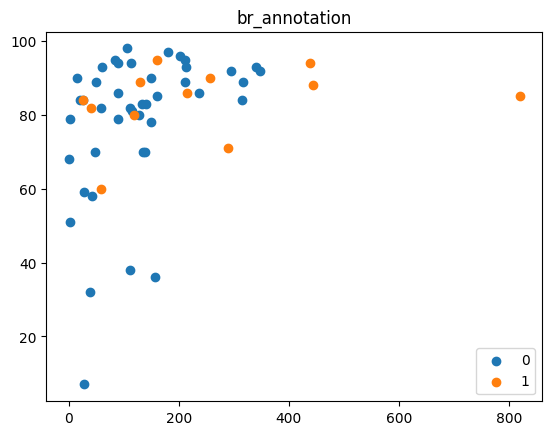

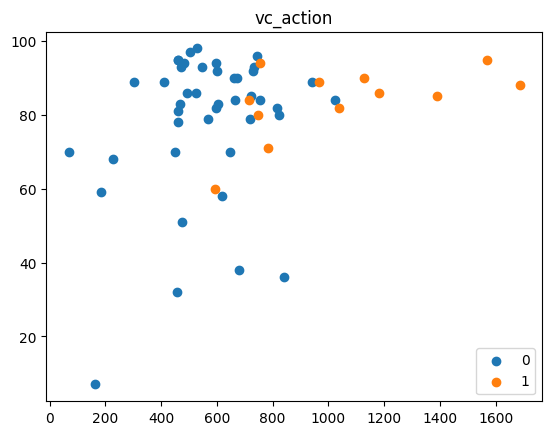

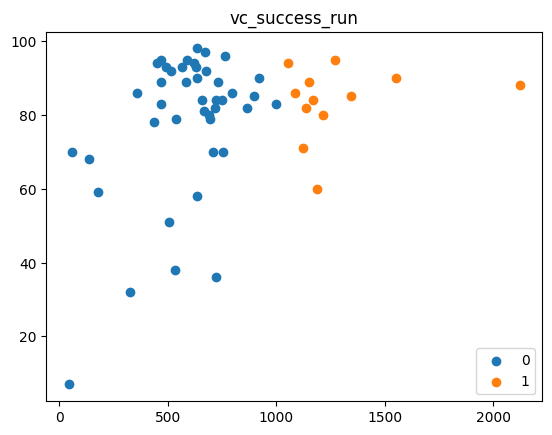

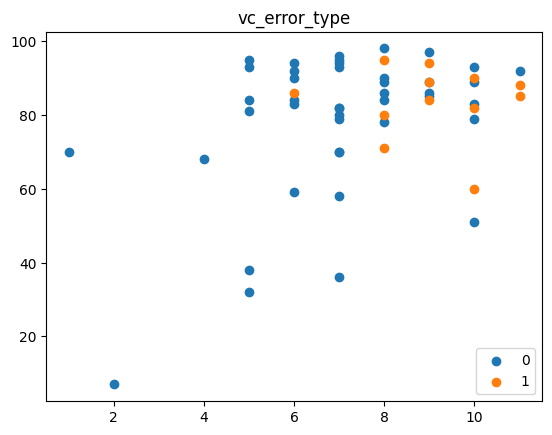

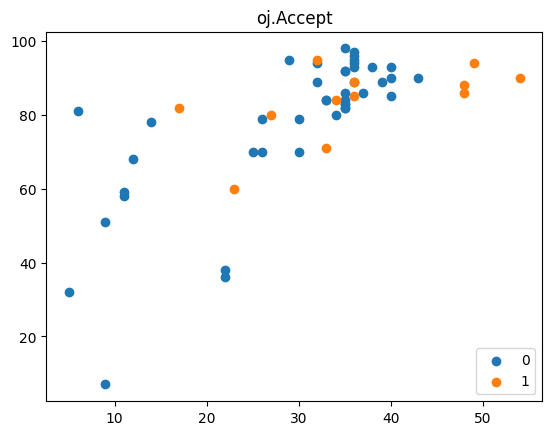

In [118]:
print('[全做Kmeans]')
X = merge_data[keep_list]
# KMeans 演算法
kmeans_fit = KMeans(n_clusters = 2,random_state=0).fit(X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_ # 或是 =  KM.predict(X) #
print("分群結果：")
print(cluster_labels)
print("---")

# 印出score
print("真實分數：")
print(merge_score.values)

u_labels = np.unique(cluster_labels)
for feature in keep_list: 
    plt.figure()
    for i in u_labels:
        plt.title(feature)
        plt.scatter(X[feature][X[cluster_labels==i].index] , merge_score[merge_score[cluster_labels==i].index], label = i)
    plt.legend(loc='lower right')
    results_path = '../plot/KMeans/BR_VC_OJ_Feature_Selection_Keep_list/' + feature + '.png'
    plt.savefig(results_path, dpi='figure', bbox_inches='tight')

# Correlation

In [20]:
test_pd = merge_pd.drop(['userid','class'],axis=1)
sig1 = []
sig2 = []
sig3 = []
for row in test_pd :
    for col in test_pd : 
        x = test_pd[row]
        y = test_pd[col]

    #calculation correlation coefficient and p-value between x and y
    # r = round(pearsonr(x, y)[0], 4) # extract correlation coefficient (rounded to 4 decimal places)
        p = pearsonr(x, y)[1] # extract p-value (rounded to 4 decimal places) 
        if ( row == 'score' ) :
            print( round(pearsonr(x, y)[0], 2))
            
            if ( p < 0.05 ) : # 0.01 < p and
                print('有顯著*: ', row, col)
            if ( p < 0.01 ): # 0.001 < p and
                print('有顯著**: ', row, col)
            if ( p < 0.001 ) :
                print('有顯著***: ', row, col)
           
        
        if ( p < 0.05 ) : # 0.01 < p and
            # print('有顯著*: ', row, col)
            sig1.append({row, col})
        if ( p < 0.01 ): # 0.001 < p and
            # print('有顯著**: ', row, col)
            sig2.append({row, col})
        if ( p < 0.001 ) :
            # print('有顯著***: ', row, col)
            sig3.append({row, col})
            

0.31
有顯著*:  score br_annotation
0.29
有顯著*:  score br_reading_action
0.32
有顯著*:  score vc_success_run
-0.0
0.29
有顯著*:  score vc_action
0.38
有顯著*:  score vc_error_type
有顯著**:  score vc_error_type
0.71
有顯著*:  score oj.Accept
有顯著**:  score oj.Accept
有顯著***:  score oj.Accept
-0.24
-0.17
0.06
-0.01
1.0
有顯著*:  score score
有顯著**:  score score
有顯著***:  score score


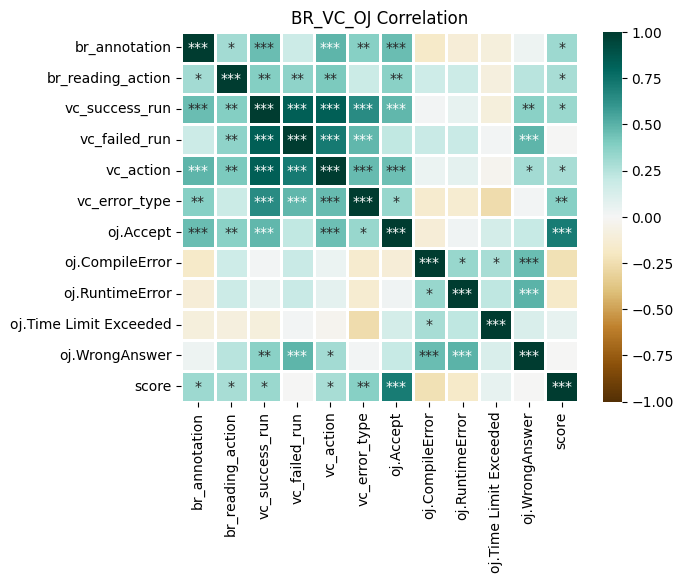

In [26]:
test_pd = merge_pd.drop(['userid','class'],axis=1)

# plt.figure(figsize = (50, 50))
ax = plt.axes()
ax.set_title('BR_VC_OJ Correlation')

corr = test_pd.corr()

'''
# abs(correlation) 低於cut_off值的欄位都不顯示
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]
    annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]
'''

# f"{val:.2f}"
annot = [[ ""
          + ('*' if {row, col} in sig1 else '')  # add one star if abs(val) >= extreme_1
          + ('*' if {row, col} in sig2 else '')  # add an extra star if abs(val) >= extreme_2
          + ('*' if {row, col} in sig3 else '')  # add yet an extra star if abs(val) >= extreme_3
          for col in corr.columns ] for row in corr.index ]


# annot = [[ ('*' if {row, col} in sig3 else '')  # add yet an extra star if abs(val) >= extreme_3
#           for col in corr.columns ] for row in corr.index ]


heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG', linewidths=1, color='gray')

# save png
results_path = '../plot/Correlation/BR_VC_OJ Correlation with Significant Star.png'
# plt.savefig(results_path, dpi='figure', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>